In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os,sys
import pylab as plt
%matplotlib inline

import glob


In [2]:
src_dir = '../src'
sys.path.append(src_dir)
from jsd import jsdalpha

In [3]:
src_meta = '../../gutenberg/src/'
sys.path.append(src_meta)
from metaquery import meta_query


In [4]:
# Load meta data

In [5]:
meta=meta_query(path=src_meta+'../metadata/metadata.csv')

# Subjects

In [6]:
Smax = 10

meta.reset()
meta.filter_lang('en')
subjects=meta.get_subjects_counts()


list_subjects = []
for s,n_s in subjects.most_common(Smax):
    print(s,n_s)
    list_subjects+=[s]

Short stories 1605
Science fiction 1508
Fiction 1290
Adventure stories 793
Conduct of life -- Juvenile fiction 645
Love stories 623
Detective and mystery stories 568
English wit and humor -- Periodicals 556
Historical fiction 502
Poetry 450


In [7]:
# list_subjects += ['All']
list_books = []

lang = 'en'
for s in list_subjects:
    meta.reset()
    meta.filter_lang(lang,how='only')
    if s=='All':
        pass
    else:
        meta.filter_subject(s,how='any')
    books_tmp = meta.get_ids()
    list_books += [books_tmp]

In [8]:
[len(h) for h in list_books]

[1636, 1508, 1292, 794, 670, 628, 568, 556, 513, 451]

In [9]:
# filename1
def textlength(filename):
    with open(filename,'r') as f:
        x=f.readlines()
        N=len(x)
    return N


In [10]:
arr_alpha = np.linspace(0.0,5.0,51)
Npair = 1000
weights = False ## standard 1/2,1.2
normalized = True ## 0<=divergence <=1

path_read = '../../gutenberg/data/counts/'

list_jsdalpha = []
list_labels = []
list_N = []
for i_s,s in enumerate(list_subjects):
    print(s)
    list_jsd_tmp = []
    books_tmp=list_books[i_s]
    list_N_tmp = []
    for i_Npair in range(Npair):
        
        book_sel = True
        while book_sel== True:

            pg1,pg2 = np.random.choice(books_tmp,replace=False,size=2)
            fname_read = '%s_counts.txt'%(pg1)
            filename1 = os.path.join(path_read,fname_read)

            fname_read = '%s_counts.txt'%(pg2)
            filename2 = os.path.join(path_read,fname_read)
            
            if os.path.isfile(filename1) and os.path.isfile(filename2):
                book_sel = False
        N1 = textlength(filename1)
        list_N_tmp += [N1]
        jsd = jsdalpha(filename1,filename2,alpha=arr_alpha,weights=weights,normalized=normalized)
        list_jsd_tmp += [jsd]
    list_jsdalpha += [list_jsd_tmp]
    list_N += [list_N_tmp]

Short stories
Science fiction
Fiction
Adventure stories
Conduct of life -- Juvenile fiction
Love stories
Detective and mystery stories
English wit and humor -- Periodicals
Historical fiction
Poetry


In [11]:
list_N_mu = [np.mean(h) for h in list_N]
# ind_sort_N
# list_N_mu

## Plot dependence on length

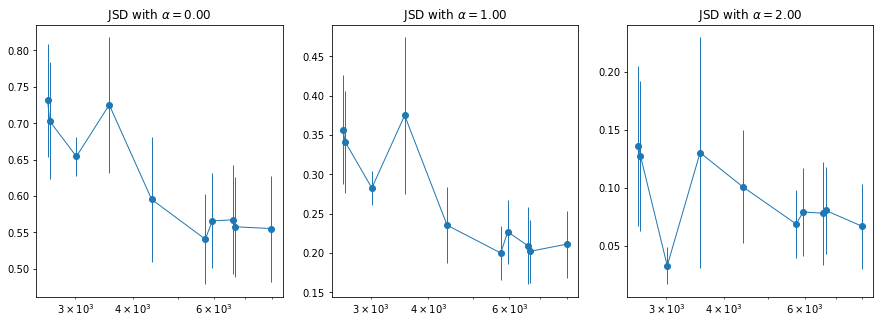

In [12]:
alpha_plot = [0.0,1.0,2.0]
i_alpha_plot = 0
f=plt.figure(figsize = (15,5))
for i_alpha,alpha in enumerate(arr_alpha):
    if alpha in alpha_plot:
        ax=f.add_subplot(1,3,i_alpha_plot+1)
        list_jsd_plot = [ [h[i_alpha] for h in jsd_tmp] for jsd_tmp in list_jsdalpha ]
        ind_sort_N = np.argsort(list_N_mu)

        x = np.array(list_N_mu)[ind_sort_N]
        y = np.array([np.mean(h) for h in list_jsd_plot])[ind_sort_N]
        yerr = np.array([np.std(h) for h in list_jsd_plot])[ind_sort_N]
        ax.errorbar(x,y,yerr=yerr,lw=1,marker='o')

        ax.set_xscale('log')

        _ = ax.set_title(r'JSD with $\alpha = %.2f$'%(alpha))
        i_alpha_plot+=1
    #     if i_alpha>0:
    #         ax.set_yticklabels([])
    #     ax.set_xlim(0,1)

## Plot Correlation coeffciient as a function of alpha

In [13]:
arr_C = 0.0*arr_alpha
for i_alpha,alpha in enumerate(arr_alpha):
    list_jsd_plot = [ [h[i_alpha] for h in jsd_tmp] for jsd_tmp in list_jsdalpha ]
    ind_sort_N = np.argsort(list_N_mu)
    x = np.array(list_N_mu)[ind_sort_N]
    y = np.array([np.mean(h) for h in list_jsd_plot])[ind_sort_N]
    C = np.corrcoef(x,y)[0,1]
    arr_C[i_alpha] = C

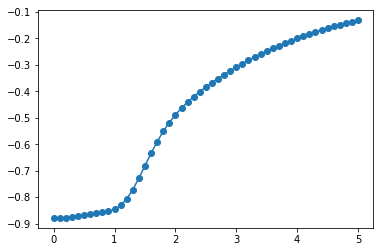

In [15]:
plt.plot(arr_alpha,arr_C,marker='o')

In [16]:
np.corrcoef(x,y)

array([[ 1.        , -0.13102243],
       [-0.13102243,  1.        ]])